🐱‍🏍 Stacking Algorithm:
* Is an ensemble learning technique that combines the predictions of multiple base models to improve overall performance. 
* In regression, stacking leverages a meta-learner to merge predictions from diverse models, yielding a more accurate and robust predictor.
* For classification, stacking similarly aggregates predictions from various classifiers, resulting in enhanced predictive power and adaptability to complex decision boundaries. 
* By incorporating diverse models and effectively blending their outputs, stacking offers a powerful approach to tackle regression and classification tasks, ultimately enhancing predictive performance beyond what individual models can achieve.

🐱‍🏍 How it works 

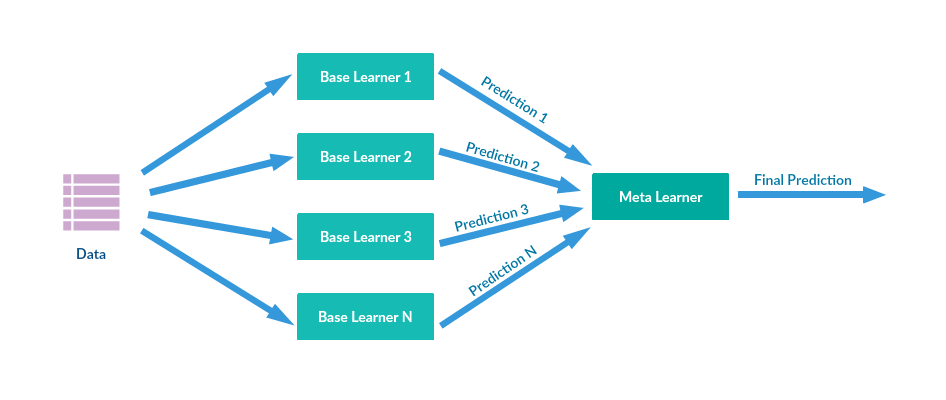

In [590]:
from IPython.display import Image
image_path = "Stacking.png"
Image(filename=image_path)

✨ Import Libraries

In [589]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,RandomForestClassifier, RandomForestRegressor,StackingClassifier ,StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report
from sklearn.preprocessing import StandardScaler
import os 
os.system("cls")


0

✨ Implementation of Stacking Regressor,Classifier From Skratch

In [570]:

class Stackig :
    def __init__ (self , base_models , meta_learner):    # user can choose base models and meta_learner 
        self.base_models = base_models
        self.meta_learner = meta_learner

    def fit (self , X ,y ) :
        base_prediction = []   # list to store the predictions of validation 
        # X >> All data 
        # split data into train and validation 
        X_train , X_validation , y_train , y_validation = train_test_split(X,y ,test_size=0.4 , random_state=42)
        # we will train base models 
        for model in (self.base_models):
            model.fit(X_train , y_train)
            # use base models to predict validation 
            base_prediction.append(model.predict(X_validation))

            # we can train meta learner >> input : base_prediction , output : y_validation
        base_prediction = np.column_stack(base_prediction)     # to make list in 2 d  
        self.meta_learner.fit(base_prediction,y_validation)
        # the model become able to take predection and get the final result (y) instade of voting 
    
    def predict ( self , X):
        base_prediction = np.column_stack([model.predict(X) for model in self.base_models] )
        return self.meta_learner.predict(base_prediction)

✨ Loading Data For Regression

In [571]:
data_regressor = pd.read_csv("data.csv")
data_regressor

,X,y
0,0.093949,0.639861
1,0.101092,0.100920
2,0.195939,0.194688
3,0.301127,0.296597
4,0.355180,0.347759
...,...,...
75,4.818314,-0.043969
76,4.882297,-0.985600
77,4.883805,-0.985344
78,4.893092,-0.983718


✨ Split Data ( X , y )

In [572]:
X = data_regressor.drop("y", axis = 1).values
y =data_regressor["y"].values

✨ Use Model Which we built from Sktarch 

In [573]:
model = Stackig (base_models=[
   DecisionTreeRegressor(),
    SVR(),
    KNeighborsRegressor()
],meta_learner=LinearRegression())

model.fit(X,y)

✨ Visualizaton

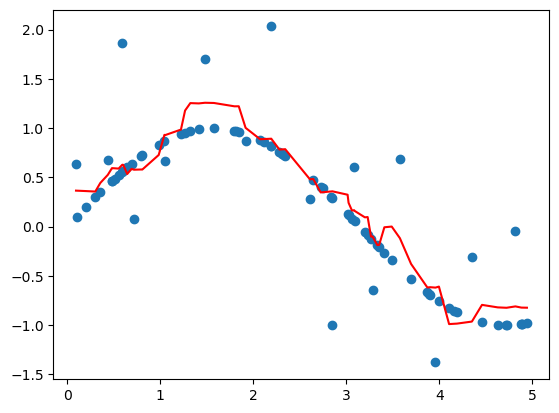

In [574]:
y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,c = "r")

✨ Check Performance using Mean_squared_error

In [575]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.11773350281768429


✨ Use Built in Algorithm from Sklearn

In [576]:
model = StackingRegressor(estimators=[
    ("lr", LinearRegression()),
    ("svr",SVR())
],final_estimator=GradientBoostingRegressor())
model.fit(X,y)

StackingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR())],
                  final_estimator=GradientBoostingRegressor())

✨ Visualization

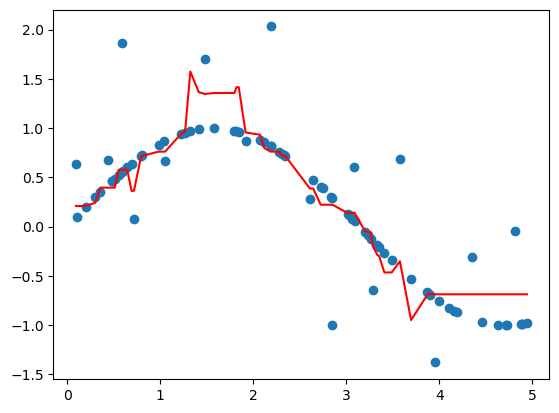

In [577]:
y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,c = "r")

✨ Check Performance using Mean_squared_error

In [578]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.12807130902087438


✨ Loading Data for Classification

In [579]:
data = pd.read_csv ("iris_data.csv")   
data                      

,feature1,feature2,target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0
...,...,...,...
145,6.7,3.0,1.0
146,6.3,2.5,1.0
147,6.5,3.0,1.0
148,6.2,3.4,1.0


✨ Split Data ( X , y ) 

In [580]:
X = data.drop("target" ,axis=1).values
y = data["target"].values
print (X.shape , y.shape)



(150, 2) (150,)


✨ Use Model Which we built from Sktarch 

In [581]:
model = Stackig (base_models=[
   DecisionTreeClassifier(),
    SVR(),
    KNeighborsClassifier()
],meta_learner=LogisticRegression())

model.fit(X,y)

✨ Reshape y 

In [582]:
y_reshaped = y.reshape(-1, 1)
print("Shape of y_reshaped:", y_reshaped.shape)


Shape of y_reshaped: (150, 1)


In [583]:
y_pred = model.predict(X)


✨ Visualization 

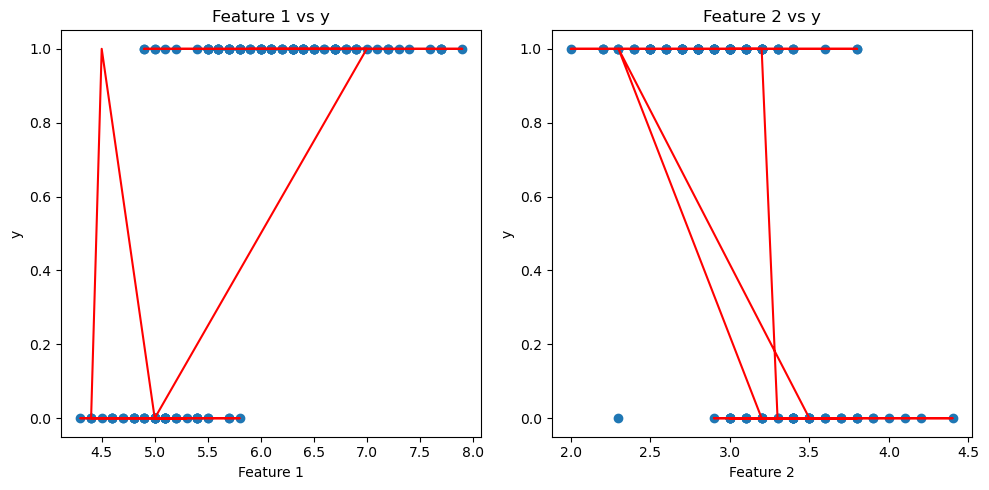

In [584]:

feature1 = X[:, 0]
feature2 = X[:, 1]

# Plot the scatter plot for each feature against y_pred
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(feature1, y_reshaped)
plt.plot(feature1, y_pred, c="r")
plt.xlabel('Feature 1')
plt.ylabel('y')
plt.title('Feature 1 vs y')

plt.subplot(1, 2, 2)
plt.scatter(feature2, y_reshaped)
plt.plot(feature2, y_pred, c="r")
plt.xlabel('Feature 2')
plt.ylabel('y')
plt.title('Feature 2 vs y')

plt.tight_layout()
plt.show()


✨ Check Performance using Accuracy_Score

In [585]:
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)       

Accuracy: 0.9933333333333333


🕵️‍♀️ Note :
- from visualization and the value of accurecy_score we notice that the model is overfit the data
- we can solve this problem by reducing the number of base models or by using StandardScaler

✨ Use Built in Algorithm from Sklearn

In [586]:
# Define your base classifiers
model = Stackig (base_models=[
   DecisionTreeClassifier(),
    SVC(),
   KNeighborsClassifier()
],meta_learner=RandomForestClassifier())
# Define your final estimator
final_estimator = GradientBoostingClassifier()

# Create the stacking classifier model
model = StackingClassifier(estimators=base_classifiers, final_estimator=final_estimator)

# Train the model
model.fit(X, y)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=GradientBoostingClassifier())

✨ Split data ( train , test)

In [587]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size=0.4 , random_state=42)
y_pred = model.predict(X_test)    

✨ Check Performance using Accuracy_Score

In [588]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


- Thanks 💖